In [1]:
import sys

if "src" not in sys.path:
    sys.path.insert(0, "src")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from joinbench.benchmark_data import BenchmarkData
from joinbench.benchmark_plotter import BenchmarkPlotter
from joinbench.evaluation_method_plotter import EvaluationMethodPlotter

In [3]:
nf = BenchmarkData("../data/joinbench1000.json")
whnf = BenchmarkData("../data/joinbenchwhnf1000.json")

In [4]:
names = nf.get_report_names_in_order()
names

['join on onePercent/modular product',
 'join on onePercent/old comprehension',
 'join on onePercent/modular indexed',
 'join onePercent and twentyPercent/modular product',
 'join onePercent and twentyPercent/old comprehension',
 'join onePercent and twentyPercent/modular indexed',
 'join onePercent and fiftyPercent/modular product',
 'join onePercent and fiftyPercent/old comprehension',
 'join onePercent and fiftyPercent/modular indexed',
 'join even and odd/modular product',
 'join even and odd/old comprehension',
 'join even and odd/modular indexed']

In [5]:
group_names = nf.get_benchmark_group_names()
group_names

{'join even and odd',
 'join on onePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and twentyPercent'}

In [6]:
group_map = nf.map_benchmark_groups_and_benchmark_indices()
group_map

defaultdict(list,
            {'join on onePercent': [(0, 'modular product'),
              (1, 'old comprehension'),
              (2, 'modular indexed')],
             'join onePercent and twentyPercent': [(3, 'modular product'),
              (4, 'old comprehension'),
              (5, 'modular indexed')],
             'join onePercent and fiftyPercent': [(6, 'modular product'),
              (7, 'old comprehension'),
              (8, 'modular indexed')],
             'join even and odd': [(9, 'modular product'),
              (10, 'old comprehension'),
              (11, 'modular indexed')]})

In [7]:
nf.get_benchmark_mean(0)

0.017542187810298832

In [8]:
whnf_plotter = BenchmarkPlotter(whnf)
# whnf_plotter.plot_benchmark_group_means(ax, g

In [9]:

bg = list(whnf.get_benchmark_group_names())[0]
bg

'join even and odd'

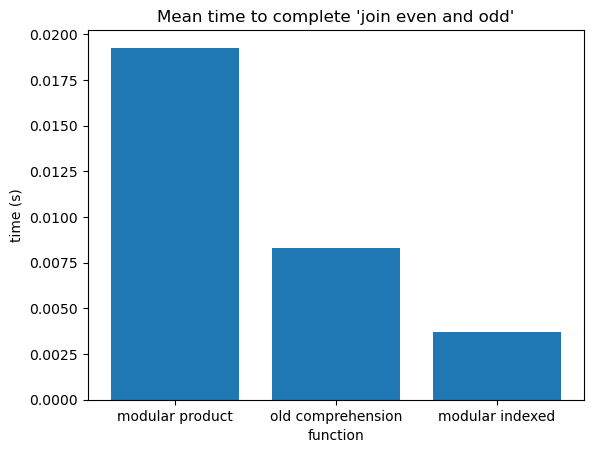

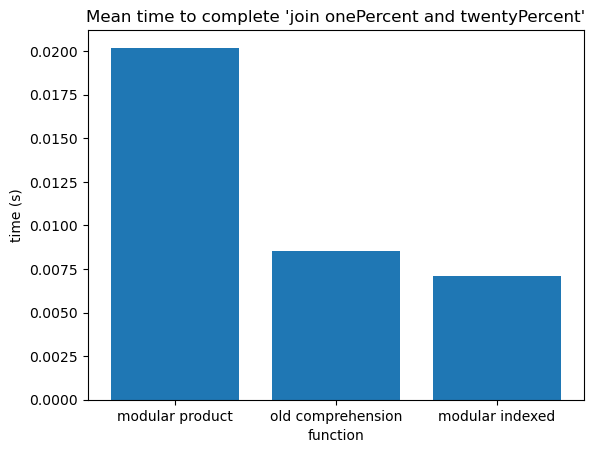

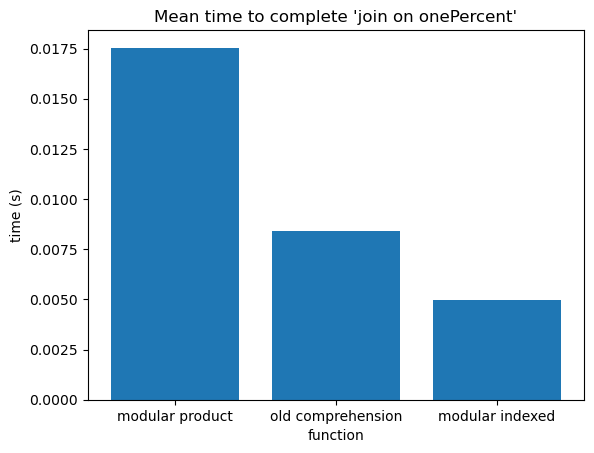

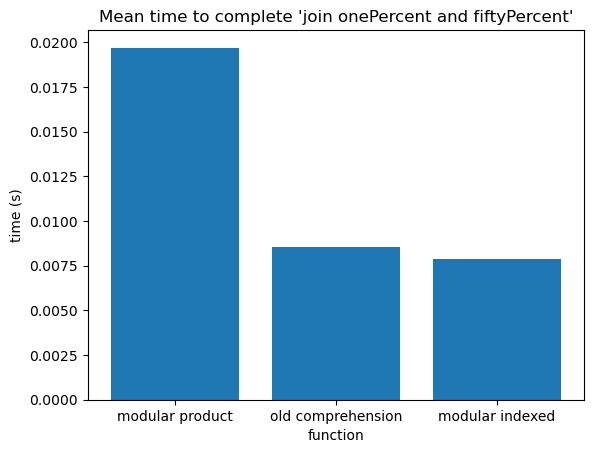

In [10]:
plotter = BenchmarkPlotter(nf)
for group_name in group_names:
    fig, ax = plt.subplots()
    plotter.plot_benchmark_group_means(ax, group_name)
plt.show()

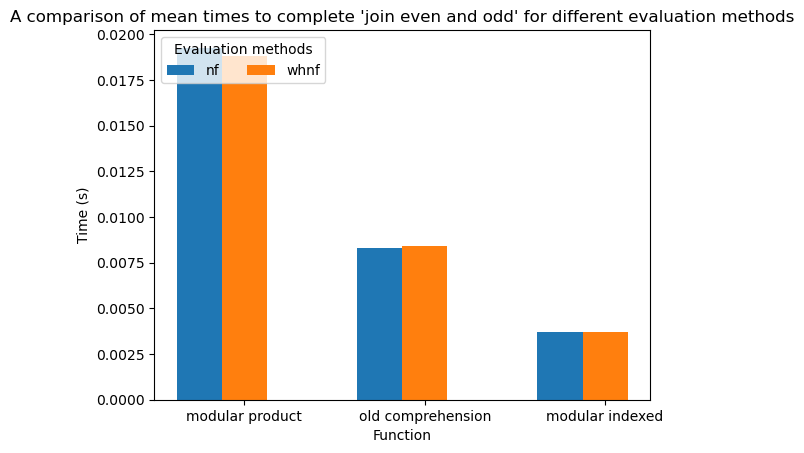

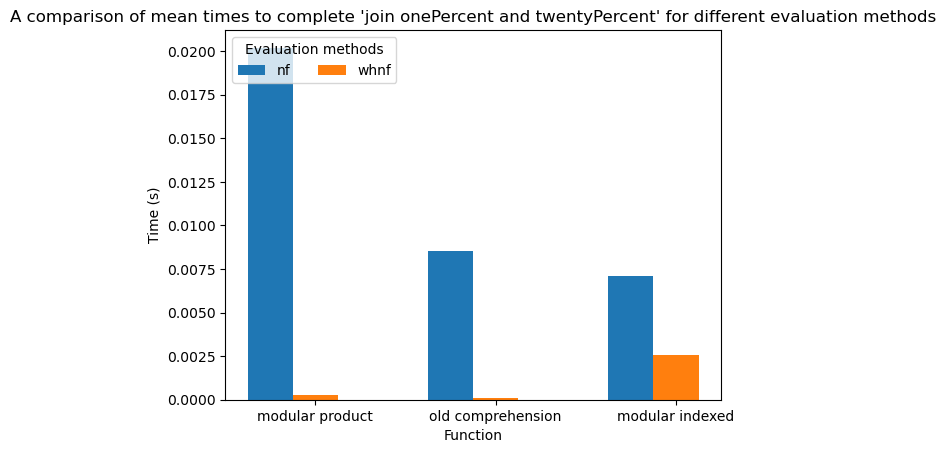

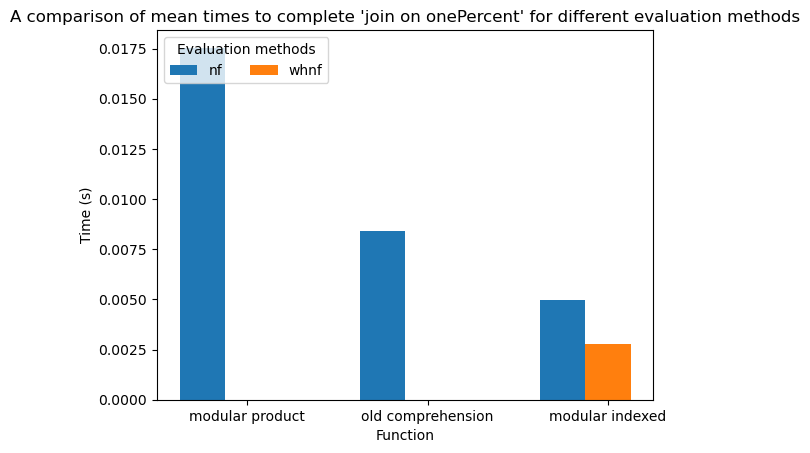

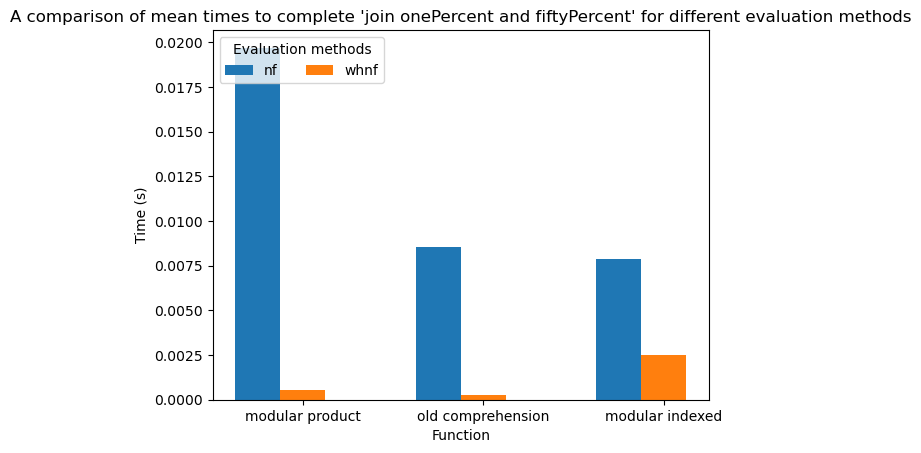

In [11]:
emp = EvaluationMethodPlotter(nf, whnf)

for group in nf.get_benchmark_group_names():
    fig, ax = plt.subplots()
    emp.plot_benchmark_group_means_comparison(ax, group)
    plt.show()

In [12]:
whnf.map_benchmark_groups_and_benchmark_indices()[bg]

[(9, 'modular product'), (10, 'old comprehension'), (11, 'modular indexed')]

In [13]:
print(whnf.get_benchmark_mean(3))
print(whnf.get_benchmark_mean(4))

0.0002456369232628761
0.0001148735411746505
